# Data Analysis for Fundamental Sciences

## What is data?

Any collection of symbols satisfying the following constraints is called "data":

1. Consistency: symbols must be recorded consistently
2. Uniformity: symbols must be collected within the same context  
3. Recall: symbols should be recalled consistently and accurately whenever they are needed

## What is data analysis?

Data analysis aims to create a "model" from the data at hand.

* Descriptive data analysis
* Predictive data analysis

![process](images/process.png)

> A mathematician is a machine that turns coffee into theorems. A *data analyst* is a machine that turns coffee and data into models.

## The usual steps one follows in solving a data analysis problem

1. Look at the data, clean it, understand it.
2. Design an experiment: make a hypothesis, design a fit function, find the optimal parameters.
3. Test your hypothesis: validate the model.
4. If necessary go back to step 2.

![the data analysis cycle](images/cycle.png)


## What tools does data analysis use?

Data analysis frequently uses 

* Machine learning
* Statistics
* Linear algebra
* Optimization 
* Computer science

![Data Science](images/Data_Science_VD.png)

(Source: [Drew Conway](http://drewconway.com/zia/2013/3/26/the-data-science-venn-diagram))

## What is a model?

A model is a function or a machine or an oracle that produces a prediction presented with a data point or a set of data points.

A *DATA* is a function $f\colon D\to Y$ defined on a finite subset $D$ of a set $X$.  The sets $X$ and $Y$ could be vector spaces, arbitrary sets, or products of vector spaces and some abstract sets.

A *MODEL* is a partial function of the form $M\colon X\to Y$ where $Y$ is the set where our predictions live.

One has to be careful here. For most mathematician a function is an algebraic or an analytic expression that describes an algorithm that produces an output for a given input.  However, here a data is a list of input, output pairs, which for a set theorist or a logician is what a function is.  So what *data analyst* call model is a *function* for a mathematician.

However, this view is too general to be of any use. For example, if $D$ is a finite subset of $\mathbb{R}^n$ and if $f\colon D\to \mathbb{R}$ is known, how many functions are there of the form $\widehat{f}\colon \mathbb{R}^n\to \mathbb{R}$ than extends $f$?  

The answers is *uncountably many*!


## What type of models are there?

* Parametric vs Nonparametric models
* Deterministic vs Nondeterministic models
* Supervised vs Nonsupervised models



xs,ys
0.000,0.02119645
0.001,0.03561071
0.002,0.07262903
0.003,0.06713197
0.004,0.08871076
0.005,0.07068169


       xs             ys           
 Min.   :0.00   Min.   :-0.005829  
 1st Qu.:0.25   1st Qu.: 0.460975  
 Median :0.50   Median : 1.401272  
 Mean   :0.50   Mean   : 1.448038  
 3rd Qu.:0.75   3rd Qu.: 2.255761  
 Max.   :1.00   Max.   : 3.374542  

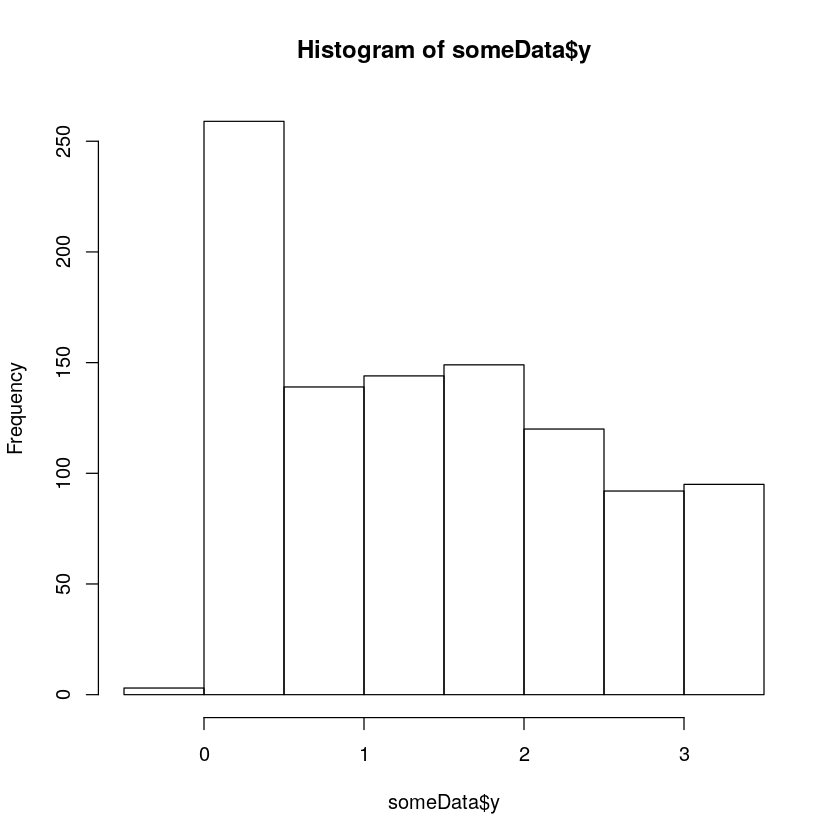

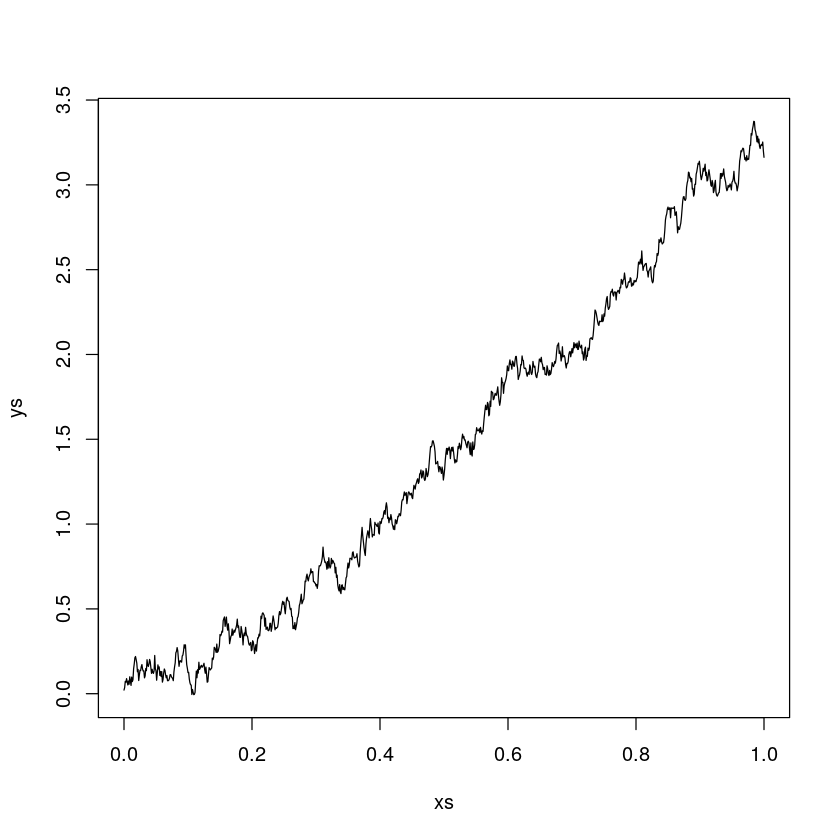

In [1]:
N <- 1000.0
deltax <- 1/N
w <- sqrt(deltax)

xs <- deltax*(0:N)
ys <- c()
y <- 0.0
for(x in xs){
    y <- y + 2*deltax + rnorm(1,sd=w,mean=0)
    ys <- c(ys, y)    
}

someData <- data.frame(xs,ys)
head(someData)
summary(someData)
hist(someData$y)
plot(someData,type="l")

In [2]:
model <- lm(ys ~ xs, data=someData)
summary(model)


Call:
lm(formula = ys ~ xs, data = someData)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30442 -0.09901 -0.02387  0.08051  0.42844 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.271137   0.008713  -31.12   <2e-16 ***
xs           3.438351   0.015087  227.90   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1379 on 999 degrees of freedom
Multiple R-squared:  0.9811,	Adjusted R-squared:  0.9811 
F-statistic: 5.194e+04 on 1 and 999 DF,  p-value: < 2.2e-16


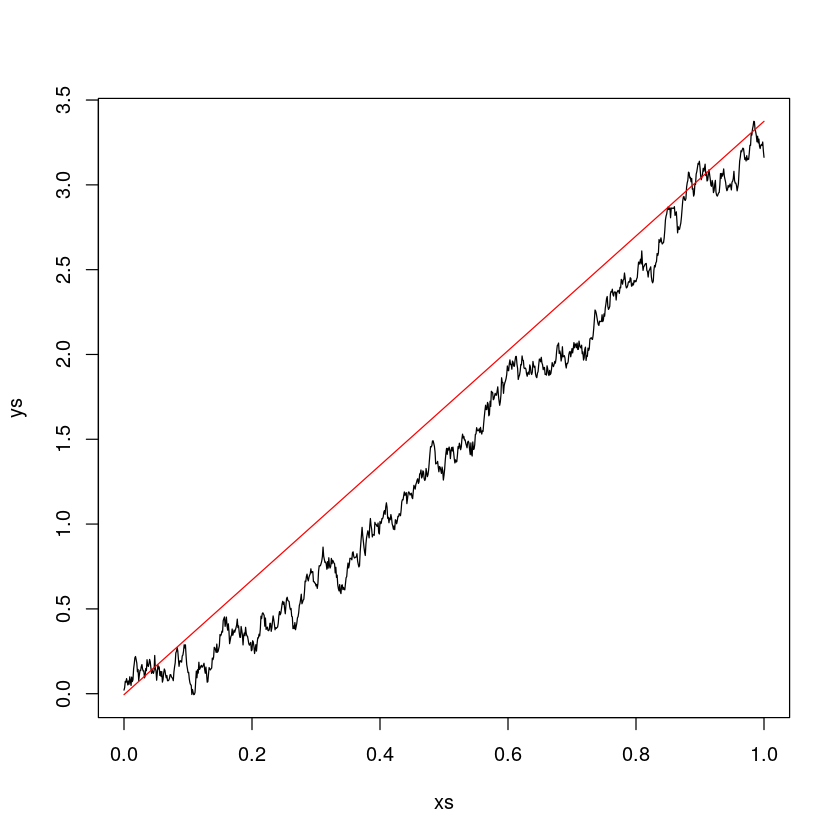

In [3]:
plot(someData, type="l")
par(new=TRUE)
alpha <- model$coefficients[2]
beta <- model$coefficients[1]
plot(data.frame(xs=someData$xs,ys=model$fitted.values), col="red", type="l", xlab="", ylab="", axes=F)

## How does data analysis create a model?

Given a set of data points and a parametric model, we first create a **cost function** or a **fit function** depending on the parameter.  Then the problem turns into an *optimization* problem.  There are plenty of mathematical methods/algorithms to find optimal parameters that minimize a **cost function**.

## How does one validate a model?

The key concept is *validation*.

![validation process](images/validation.png)

## Bias ve variance

![bias vs variance](images/bias_vs_variance.png)

> Everything should be made as simple as possible, but not simpler.

![bias_vs_variance](images/biasvariance.png)

(Source: [Scott Fortmann](http://scott.fortmann-roe.com/docs/BiasVariance.html))

If you force your model to fit *perfectly* with the data at hand, then when new data arrives the model will produce predictions with high variance.  


In [10]:
N <- nrow(someData)
test <- sample(0:N,N*0.25)
testData <- someData[test,]
trainData <- someData[-test,]
model <- glm(ys ~ xs, data = trainData)
validation <- predict(model,testData)

In [16]:
RMSE <- sqrt(sum(mapply(function (x) {x * x}, testData$ys-validation))/nrow(testData))
RMSE

[1] 0.1516817

In [13]:
accuracy(model)

,ME,RMSE,MAE,MPE,MAPE,MASE
Training set,4.818658e-16,0.1329613,0.1053002,17.66383,35.09825,0.1230578
